In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 

In [7]:
def uniform11(n):
    return np.random.uniform(-1, 1, n) 

def normal_dist(n):
    return np.random.normal(0, 1, n) 

## JACKKNIFE AND BOOTSTRAP SECTION:

### Uniform

In [16]:
p = 0.95
step = 100
start = 100
finish = 10000

lefts_student = []
rights_student = []  

lefts_norm = []
rights_norm = []

lefts_horo = []
rights_horo = []

lefts_jackknife = []
rights_jackknife = []

lefts_bootstrap = []
rights_bootstrap =[]

for n in range(start, finish, step):
    original_dist = uniform11(n)
    
    c = np.mean(original_dist)      
    var = (np.sum((original_dist - c)**2) / (n-1)) ** 0.5         
    lefts_student.append(c - var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))
    rights_student.append(c + var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))

    c = np.mean(original_dist)
    lefts_norm.append(c - 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))
    rights_norm.append(c + 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))

    c = np.mean(original_dist)
    a = np.min(original_dist)
    b = np.max(original_dist)
    d_hora = np.sqrt(-np.log((1-p)/2)/(2 * n)) - 1/(6*n)
    left = c - (b - a) * d_hora
    right = c + (b - a) * d_hora
    lefts_horo.append(left)
    rights_horo.append(right)

    c = np.mean(original_dist)
    c_s = []
    for i in range(n):
        c_s.append(np.mean(np.concatenate((original_dist[:i], original_dist[i+1:]))))
    c_s = np.array(c_s)
    c_jack = np.mean(c_s)    
    variance = (n - 1) * np.mean(np.square(c_s - c_jack))    
    left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
    right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)          
    lefts_jackknife.append(left)
    rights_jackknife.append(right)

    c_s = []
    for i in range(1000):
        c_s.append(np.mean(np.random.choice(original_dist, size=n, replace=True)))
    c_s = np.sort(np.array(c_s))   
    left = np.percentile(c_s, 2.5)
    right = np.percentile(c_s, 97.5)
    lefts_bootstrap.append(left)
    rights_bootstrap.append(right)


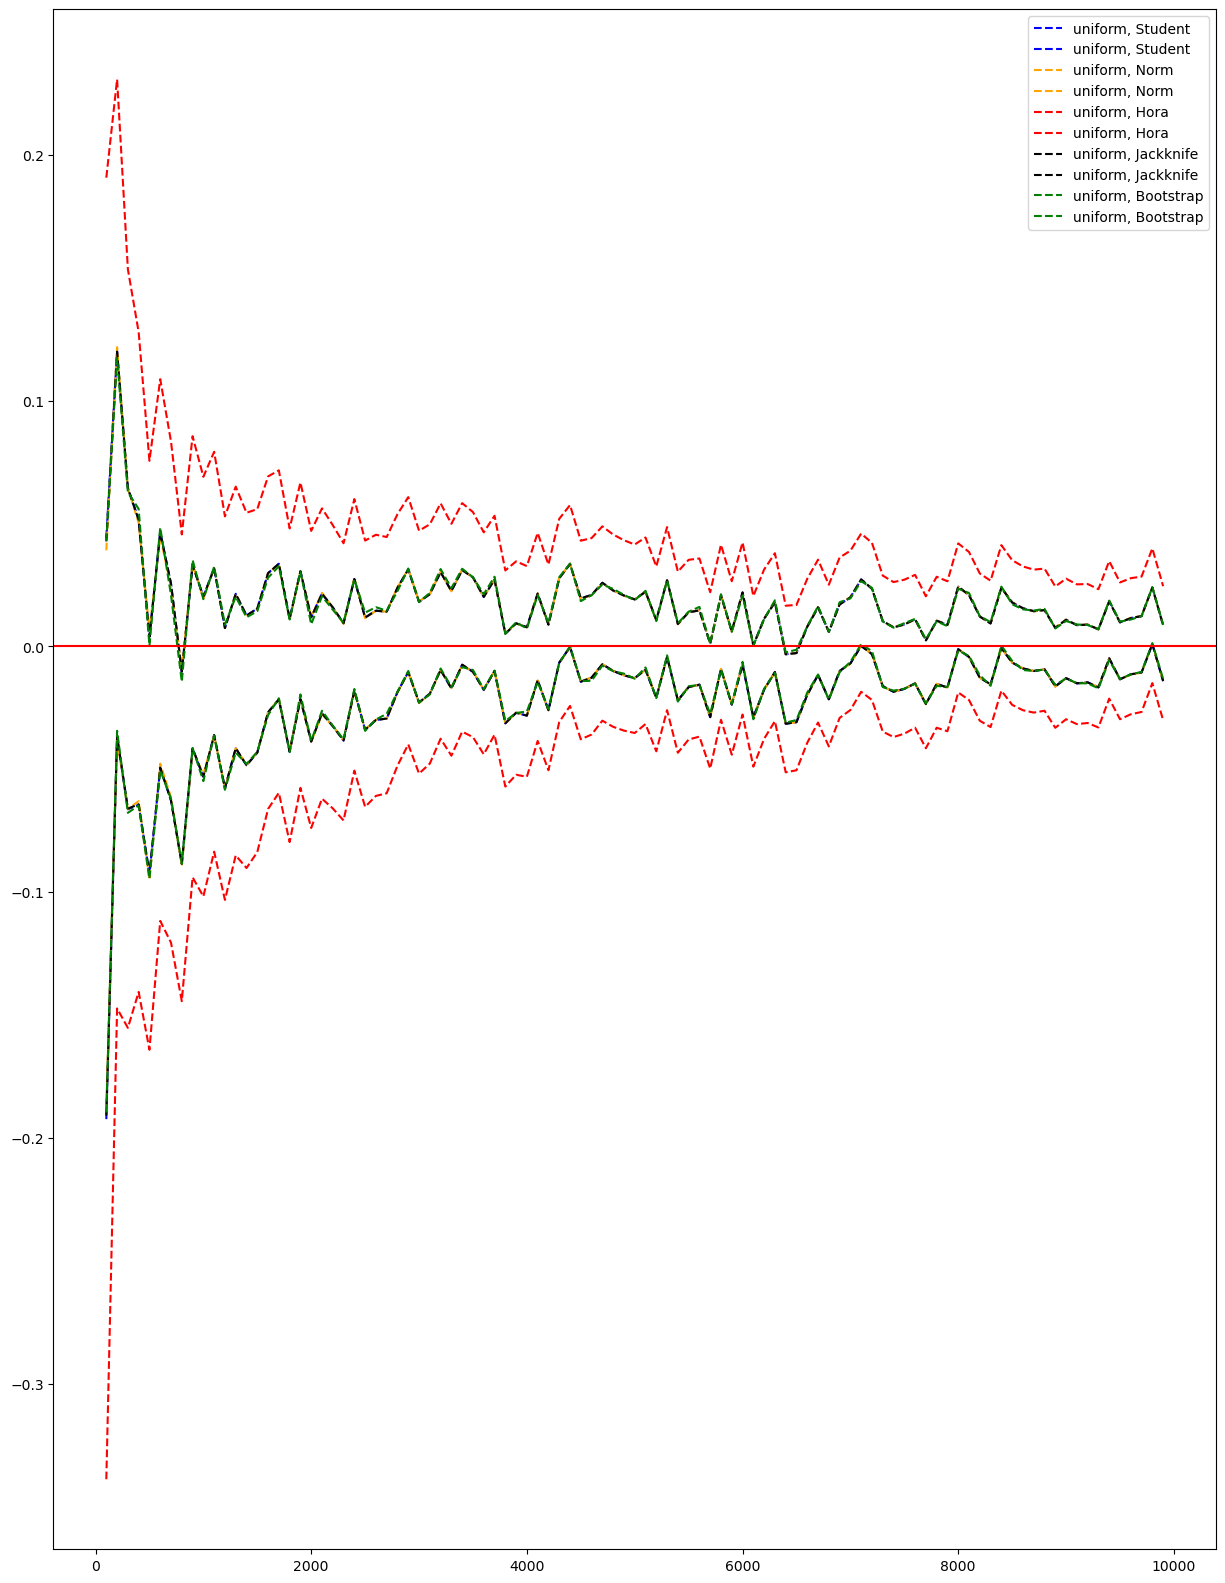

In [17]:
plt.plot(range(start, finish, step),lefts_student, label='uniform, Student', color='blue', linestyle='dashed')
plt.plot(range(start, finish, step),rights_student, label='uniform, Student', color='blue', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_norm, label='uniform, Norm', color='orange', linestyle='dashed')
plt.plot(range(start, finish, step),rights_norm, label='uniform, Norm', color='orange', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_horo, label='uniform, Hora', color='red', linestyle='dashed')
plt.plot(range(start, finish, step),rights_horo, label='uniform, Hora', color='red', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_jackknife, label='uniform, Jackknife', color='black', linestyle='dashed')
plt.plot(range(start, finish, step),rights_jackknife, label='uniform, Jackknife', color='black', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_bootstrap, label='uniform, Bootstrap', color='green', linestyle='dashed')
plt.plot(range(start, finish, step),rights_bootstrap, label='uniform, Bootstrap', color='green', linestyle='dashed')

plt.axhline(y=0, color='r', linestyle='-')

plt.rcParams["figure.figsize"] = (15, 20)
plt.legend()
plt.show()

### Normal

In [10]:
p = 0.95
step = 10
start = 10
finish = 1000

lefts_student = []
rights_student = []  

lefts_norm = []
rights_norm = []

lefts_horo = []
rights_horo = []

lefts_jackknife = []
rights_jackknife = []

lefts_bootstrap = []
rights_bootstrap =[]

for n in range(start, finish, step):
    original_dist = normal_dist(n)
    
    c = np.mean(original_dist)      
    var = (np.sum((original_dist - c)**2) / (n-1)) ** 0.5         
    lefts_student.append(c - var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))
    rights_student.append(c + var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))

    c = np.mean(original_dist)
    lefts_norm.append(c - 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))
    rights_norm.append(c + 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))

    c = np.mean(original_dist)
    a = np.min(original_dist)
    b = np.max(original_dist)
    d_hora = np.sqrt(-np.log((1-p)/2)/(2 * n)) - 1/(6*n)
    left = c - (b - a) * d_hora
    right = c + (b - a) * d_hora
    lefts_horo.append(left)
    rights_horo.append(right)

    c = np.mean(original_dist)
    c_s = []
    for i in range(n):
        c_s.append(np.mean(np.concatenate((original_dist[:i], original_dist[i+1:]))))
    c_s = np.array(c_s)
    c_jack = np.mean(c_s)    
    variance = (n - 1) * np.mean(np.square(c_s - c_jack))    
    left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
    right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)          
    lefts_jackknife.append(left)
    rights_jackknife.append(right)

    c_s = []
    for i in range(1000):
        c_s.append(np.mean(np.random.choice(original_dist, size=n, replace=True)))
    c_s = np.sort(np.array(c_s))   
    left = np.percentile(c_s, 2.5)
    right = np.percentile(c_s, 97.5)
    lefts_bootstrap.append(left)
    rights_bootstrap.append(right)


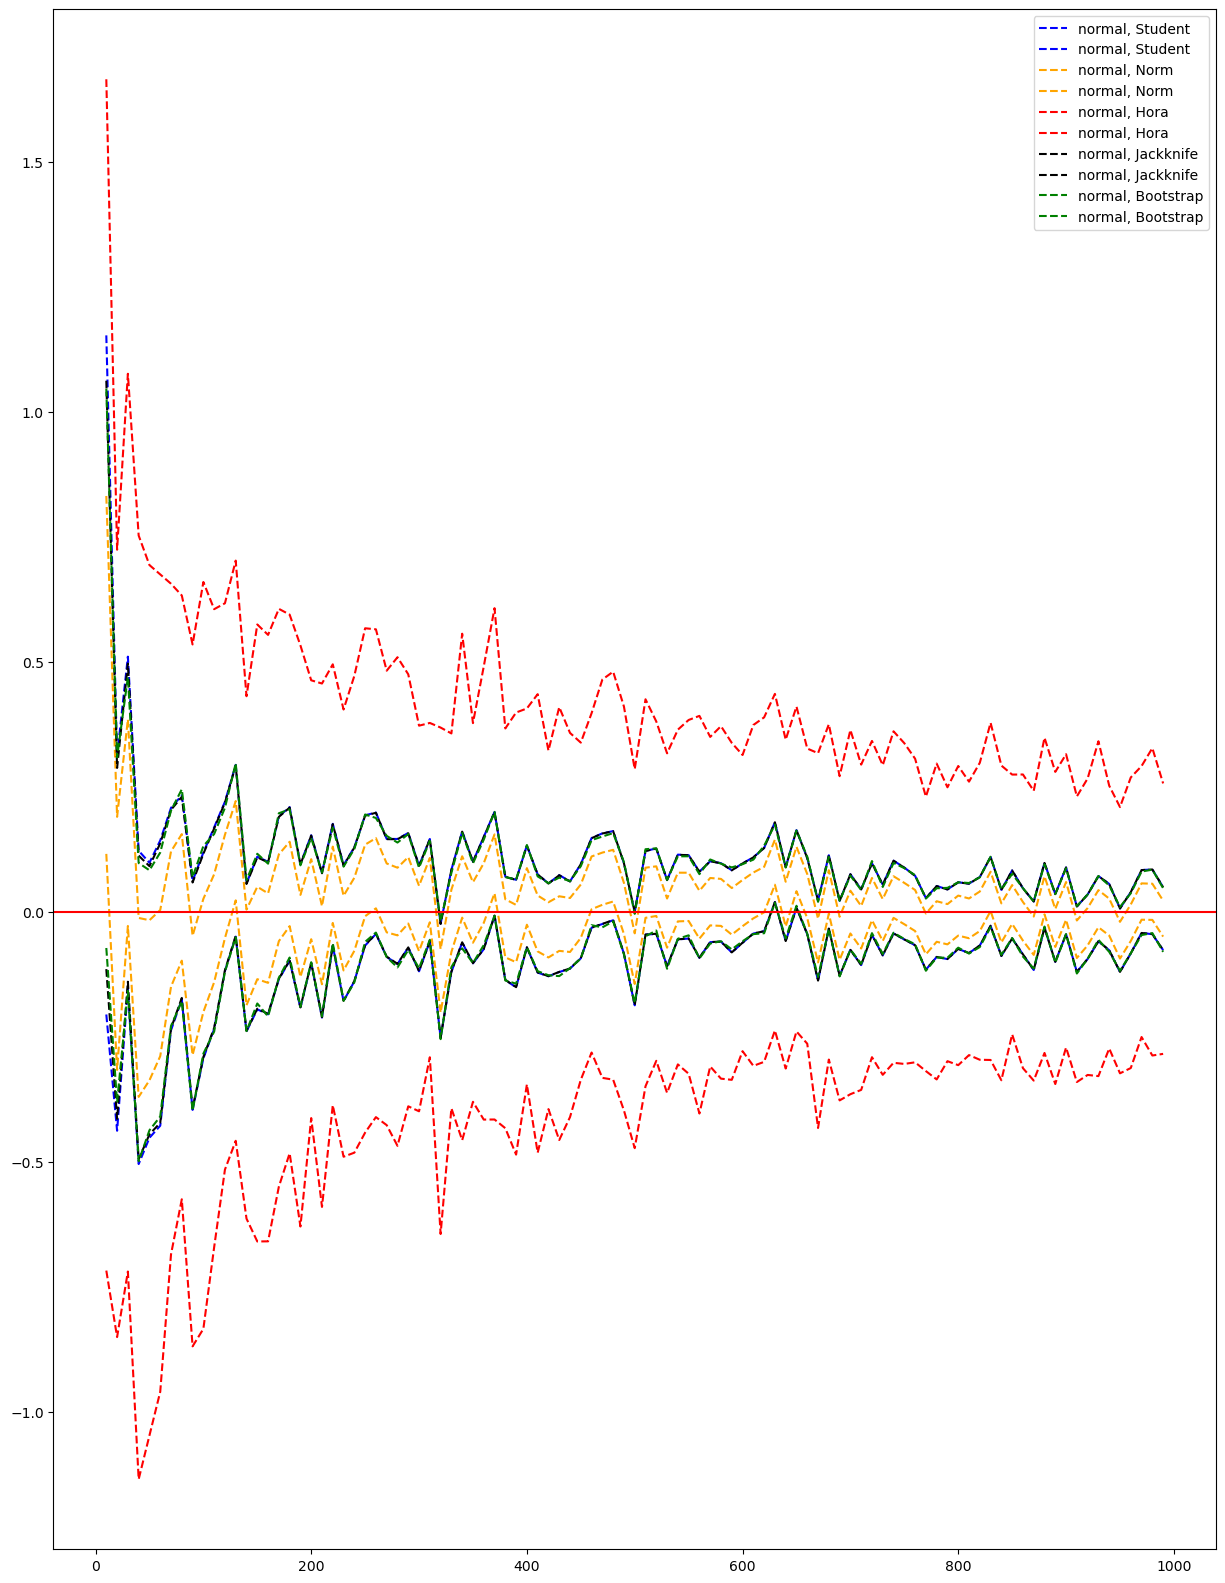

In [11]:
plt.plot(range(start, finish, step),lefts_student, label='normal, Student', color='blue', linestyle='dashed')
plt.plot(range(start, finish, step),rights_student, label='normal, Student', color='blue', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_norm, label='normal, Norm', color='orange', linestyle='dashed')
plt.plot(range(start, finish, step),rights_norm, label='normal, Norm', color='orange', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_horo, label='normal, Hora', color='red', linestyle='dashed')
plt.plot(range(start, finish, step),rights_horo, label='normal, Hora', color='red', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_jackknife, label='normal, Jackknife', color='black', linestyle='dashed')
plt.plot(range(start, finish, step),rights_jackknife, label='normal, Jackknife', color='black', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_bootstrap, label='normal, Bootstrap', color='green', linestyle='dashed')
plt.plot(range(start, finish, step),rights_bootstrap, label='normal, Bootstrap', color='green', linestyle='dashed')

plt.axhline(y=0, color='r', linestyle='-')

plt.rcParams["figure.figsize"] = (15, 20)
plt.legend()
plt.show()

## ROBUSTNESS

In [12]:
p = 0.95
step = 10
start = 10
finish = 1000

lefts_student = []
rights_student = []  

lefts_norm = []
rights_norm = []

lefts_horo = []
rights_horo = []

lefts_jackknife = []
rights_jackknife = []

lefts_bootstrap = []
rights_bootstrap =[]

for n in range(start, finish, step):
    original_dist = np.append(uniform11(n-1), 100)
    
    c = np.mean(original_dist)      
    var = (np.sum((original_dist - c)**2) / (n-1)) ** 0.5         
    lefts_student.append(c - var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))
    rights_student.append(c + var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))

    c = np.mean(original_dist)
    lefts_norm.append(c - 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))
    rights_norm.append(c + 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))

    c = np.mean(original_dist)
    sorted_dist = np.sort(original_dist)
    a = sorted_dist[1]
    b = sorted_dist[-2]
    d_hora = np.sqrt(-np.log((1-p)/2)/(2 * n)) - 1/(6*n)
    left = c - (b - a) * d_hora
    right = c + (b - a) * d_hora
    lefts_horo.append(left)
    rights_horo.append(right)

    c = np.mean(original_dist)
    c_s = []
    for i in range(n):
        c_s.append(np.mean(np.concatenate((original_dist[:i], original_dist[i+1:]))))
    c_s = np.array(c_s)
    c_jack = np.mean(c_s)    
    variance = (n - 1) * np.mean(np.square(c_s - c_jack))    
    left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
    right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)          
    lefts_jackknife.append(left)
    rights_jackknife.append(right)

    c_s = []
    for i in range(1000):
        c_s.append(np.mean(np.random.choice(original_dist, size=n, replace=True)))
    c_s = np.sort(np.array(c_s))   
    left = np.percentile(c_s, 2.5)
    right = np.percentile(c_s, 97.5)
    lefts_bootstrap.append(left)
    rights_bootstrap.append(right)


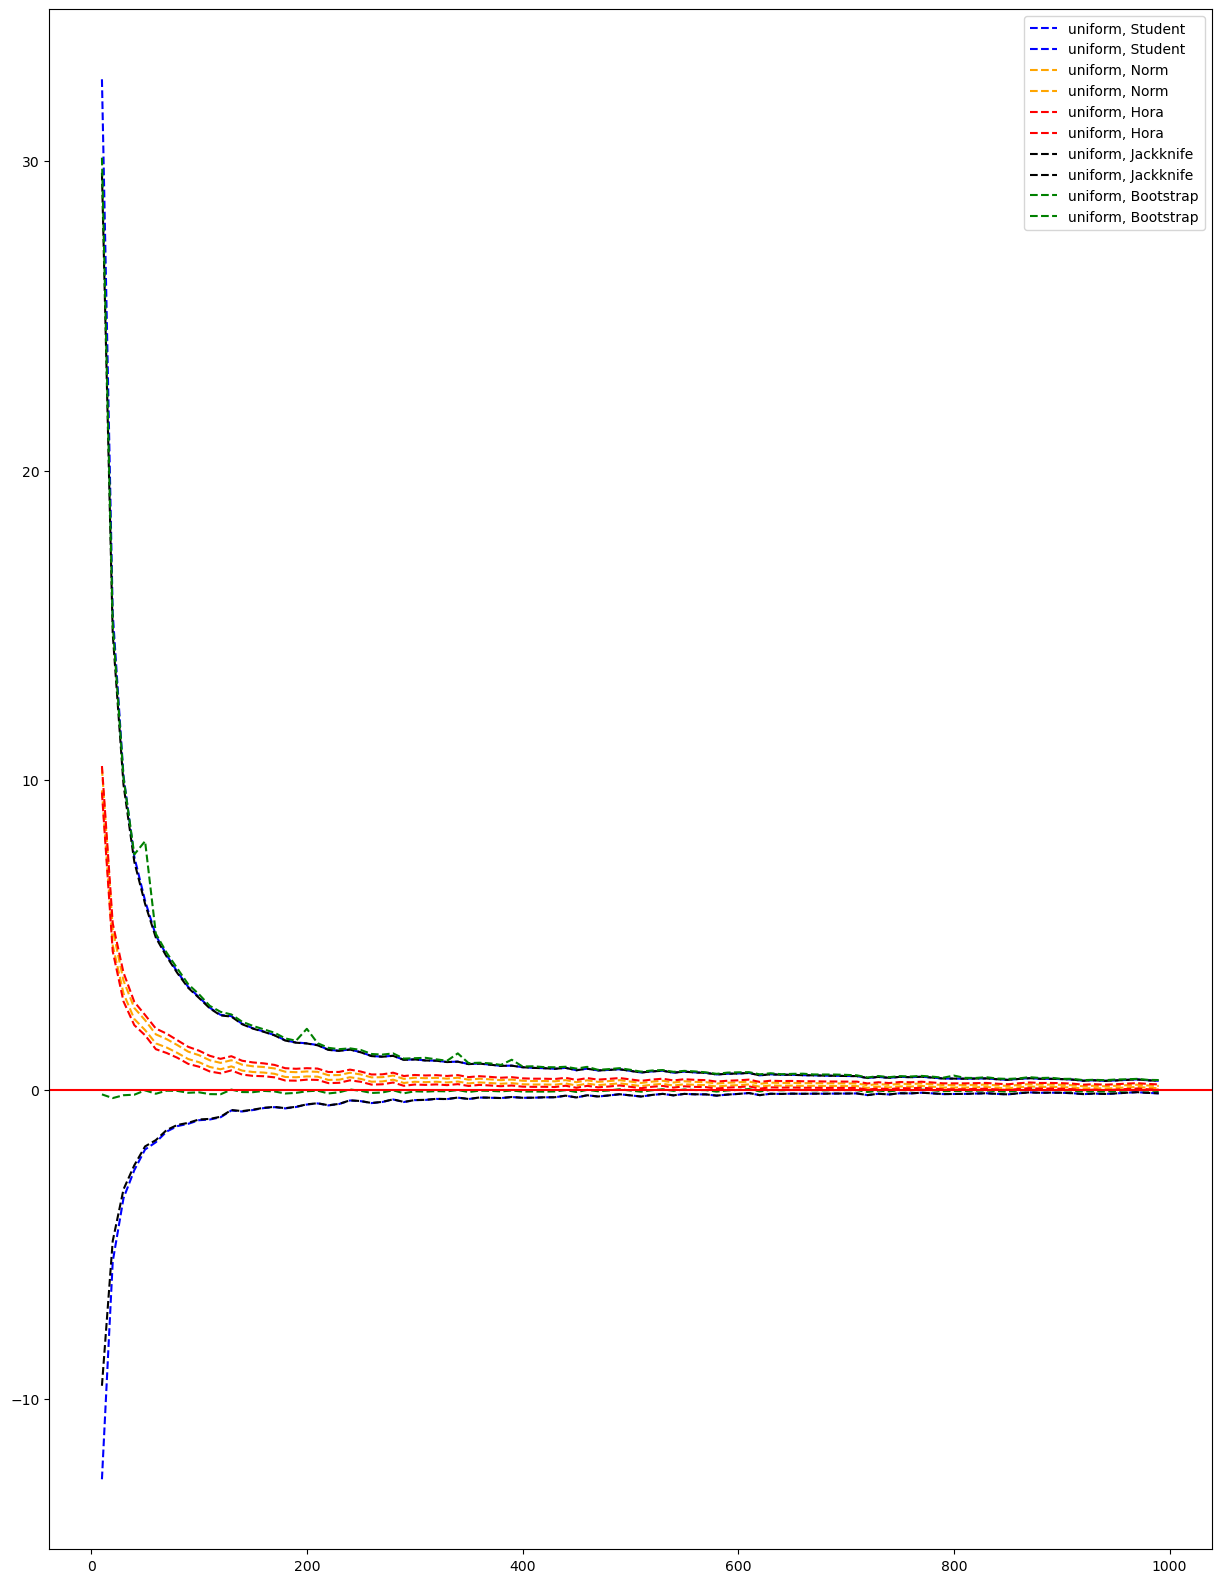

In [13]:
plt.plot(range(start, finish, step),lefts_student, label='uniform, Student', color='blue', linestyle='dashed')
plt.plot(range(start, finish, step),rights_student, label='uniform, Student', color='blue', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_norm, label='uniform, Norm', color='orange', linestyle='dashed')
plt.plot(range(start, finish, step),rights_norm, label='uniform, Norm', color='orange', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_horo, label='uniform, Hora', color='red', linestyle='dashed')
plt.plot(range(start, finish, step),rights_horo, label='uniform, Hora', color='red', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_jackknife, label='uniform, Jackknife', color='black', linestyle='dashed')
plt.plot(range(start, finish, step),rights_jackknife, label='uniform, Jackknife', color='black', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_bootstrap, label='uniform, Bootstrap', color='green', linestyle='dashed')
plt.plot(range(start, finish, step),rights_bootstrap, label='uniform, Bootstrap', color='green', linestyle='dashed')

plt.axhline(y=0, color='r', linestyle='-')

plt.rcParams["figure.figsize"] = (15, 20)
plt.legend()
plt.show()

In [14]:
p = 0.95
step = 10
start = 10
finish = 1000

lefts_student = []
rights_student = []  

lefts_norm = []
rights_norm = []

lefts_horo = []
rights_horo = []

lefts_jackknife = []
rights_jackknife = []

lefts_bootstrap = []
rights_bootstrap =[]

for n in range(start, finish, step):
    original_dist = np.append(normal_dist(n-1), 100)
    
    c = np.mean(original_dist)      
    var = (np.sum((original_dist - c)**2) / (n-1)) ** 0.5         
    lefts_student.append(c - var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))
    rights_student.append(c + var/np.sqrt(n) * st.t.ppf(q=0.975, df=n-1))

    c = np.mean(original_dist)
    lefts_norm.append(c - 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))
    rights_norm.append(c + 1/np.sqrt(3 *n) * st.norm.ppf(q=0.975))

    c = np.mean(original_dist)
    sorted_dist = np.sort(original_dist)
    a = sorted_dist[1]
    b = sorted_dist[-2]
    d_hora = np.sqrt(-np.log((1-p)/2)/(2 * n)) - 1/(6*n)
    left = c - (b - a) * d_hora
    right = c + (b - a) * d_hora
    lefts_horo.append(left)
    rights_horo.append(right)

    c = np.mean(original_dist)
    c_s = []
    for i in range(n):
        c_s.append(np.mean(np.concatenate((original_dist[:i], original_dist[i+1:]))))
    c_s = np.array(c_s)
    c_jack = np.mean(c_s)    
    variance = (n - 1) * np.mean(np.square(c_s - c_jack))    
    left = c - np.sqrt(variance) * st.norm.ppf(q=0.975)
    right = c + np.sqrt(variance) * st.norm.ppf(q=0.975)          
    lefts_jackknife.append(left)
    rights_jackknife.append(right)

    c_s = []
    for i in range(1000):
        c_s.append(np.mean(np.random.choice(original_dist, size=n, replace=True)))
    c_s = np.sort(np.array(c_s))   
    left = np.percentile(c_s, 2.5)
    right = np.percentile(c_s, 97.5)
    lefts_bootstrap.append(left)
    rights_bootstrap.append(right)


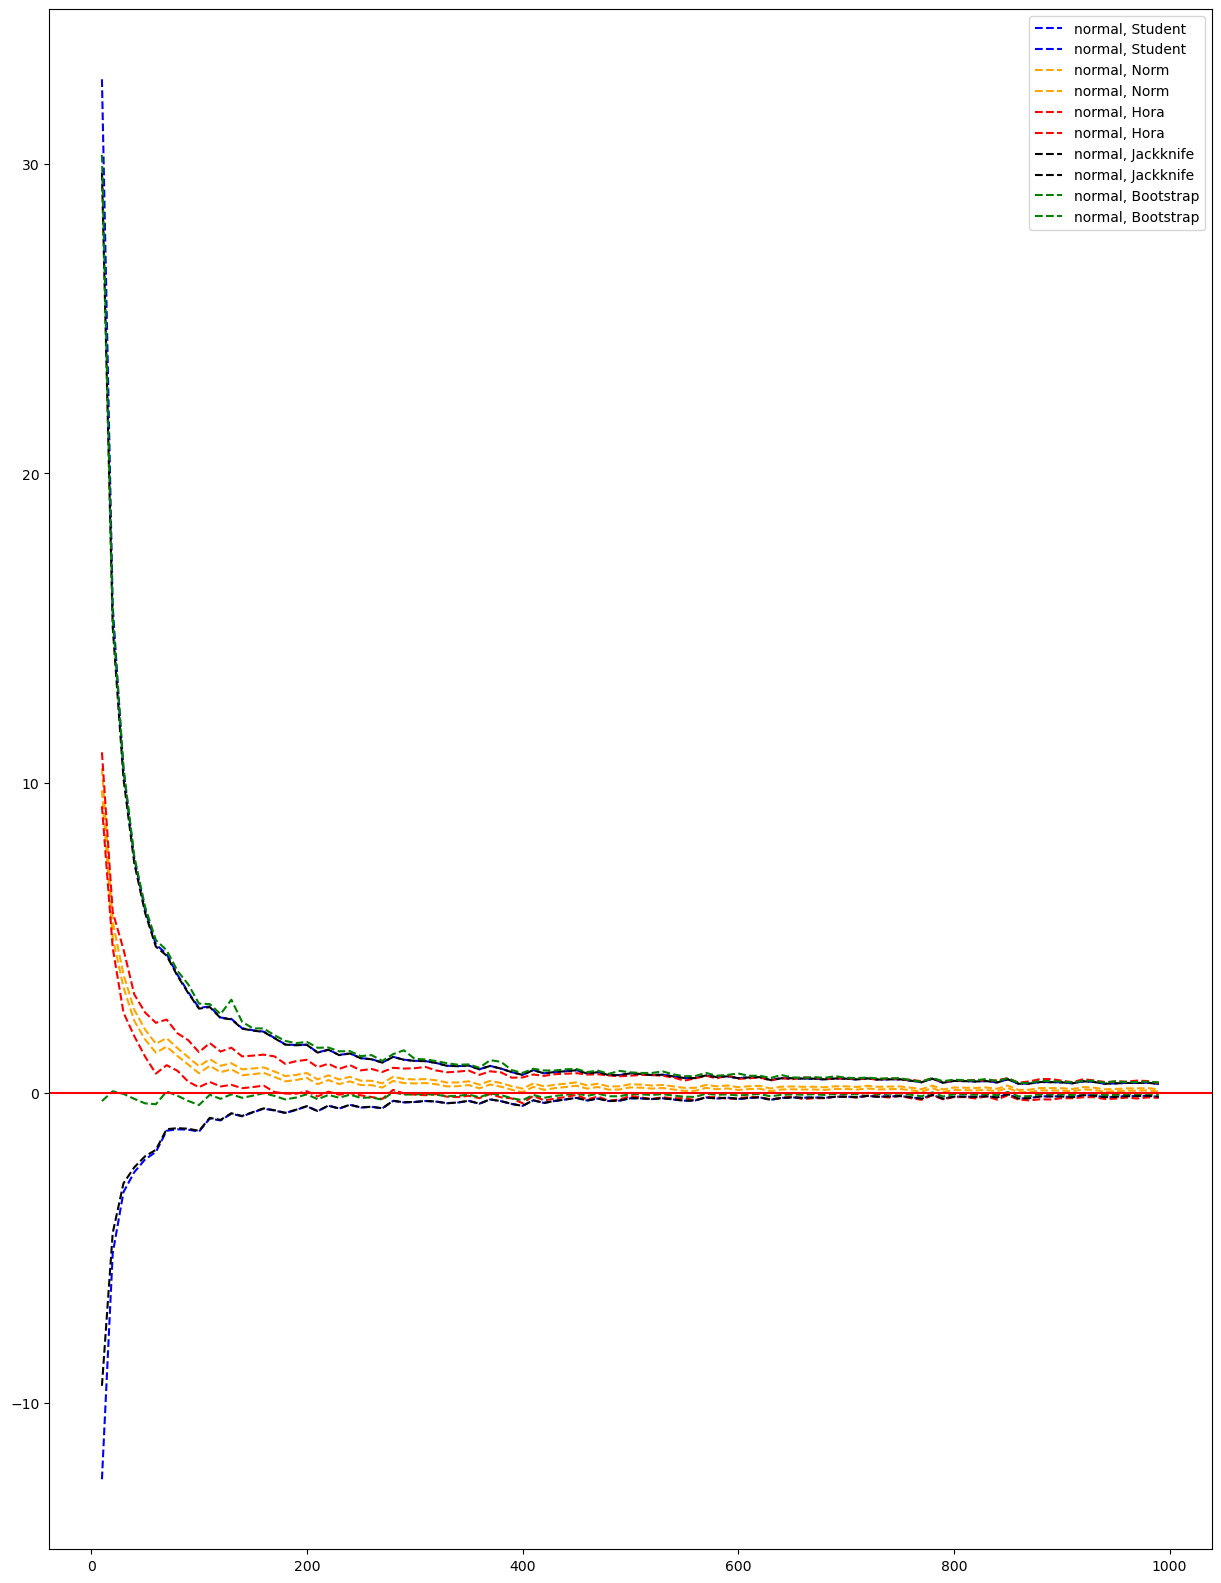

In [15]:
plt.plot(range(start, finish, step),lefts_student, label='normal, Student', color='blue', linestyle='dashed')
plt.plot(range(start, finish, step),rights_student, label='normal, Student', color='blue', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_norm, label='normal, Norm', color='orange', linestyle='dashed')
plt.plot(range(start, finish, step),rights_norm, label='normal, Norm', color='orange', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_horo, label='normal, Hora', color='red', linestyle='dashed')
plt.plot(range(start, finish, step),rights_horo, label='normal, Hora', color='red', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_jackknife, label='normal, Jackknife', color='black', linestyle='dashed')
plt.plot(range(start, finish, step),rights_jackknife, label='normal, Jackknife', color='black', linestyle='dashed')

plt.plot(range(start, finish, step),lefts_bootstrap, label='normal, Bootstrap', color='green', linestyle='dashed')
plt.plot(range(start, finish, step),rights_bootstrap, label='normal, Bootstrap', color='green', linestyle='dashed')

plt.axhline(y=0, color='r', linestyle='-')

plt.rcParams["figure.figsize"] = (15, 20)
plt.legend()
plt.show()